DSI Lec 5 - Beyond matplotlib! May 6th, 2025 Darshan Panesar

In [30]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests

In [31]:
#load dataset and visualize some of it

tips = sns.load_dataset("tips")

print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


<Axes: xlabel='total_bill', ylabel='tip'>

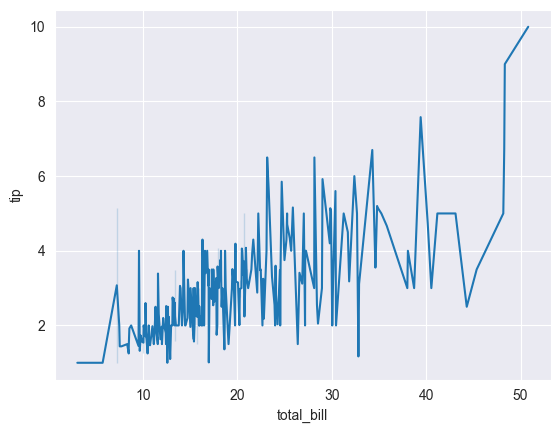

In [32]:
#use sns to make a line plot with the x as total_bill and the y at tip

sns.lineplot(data=tips, # choose our dataset
             x= 'total_bill', # define our x variable'
             y= 'tip' # define our y variable
)

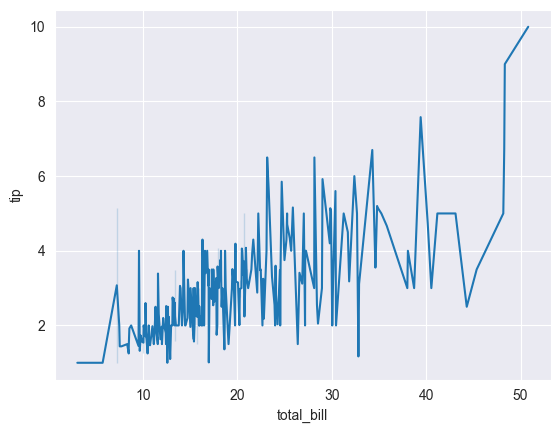

In [33]:
#setting a premade style
sns.set_style('darkgrid') #you can change the grid or other styles here e.g., whitegrid

sns.lineplot(data=tips, # choose our dataset
             x= 'total_bill', # define our x variable'
             y= 'tip', # define our y variable

)

plt.show()

[Text(0.5, 1.0, 'Tips vs. Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

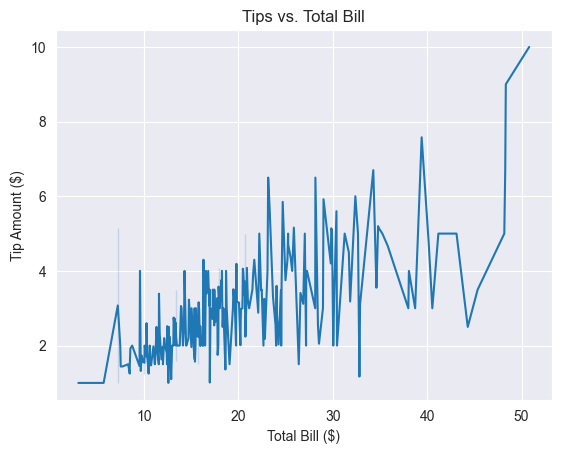

In [34]:
# adding titles and labels - note previous set gridstyle is continually used here

tipgraph = sns.lineplot(data=tips, # choose our dataset
             x= 'total_bill', # define our x variable'
             y= 'tip' # define our y variable
)

#to set the title see below
tipgraph.set(title= 'Tips vs. Total Bill', #overall title
                xlabel= 'Total Bill ($)', #xlabel
                ylabel= 'Tip Amount ($)' #ylabel
                )

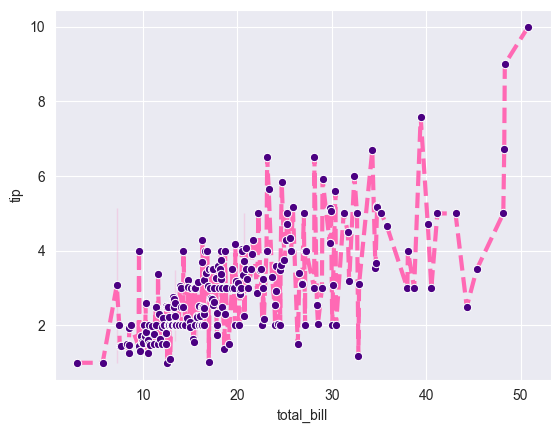

In [35]:
# MORE CUSTOMIZATION: modification of asthetic elements:

tipgraph = sns.lineplot(
    data=tips,
    x='total_bill',
    y='tip',
    color='hotpink',
    linestyle='--',
    linewidth=3,
    marker='o',
    markerfacecolor='indigo'
)

[Text(0.5, 1.0, 'Tips vs. Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

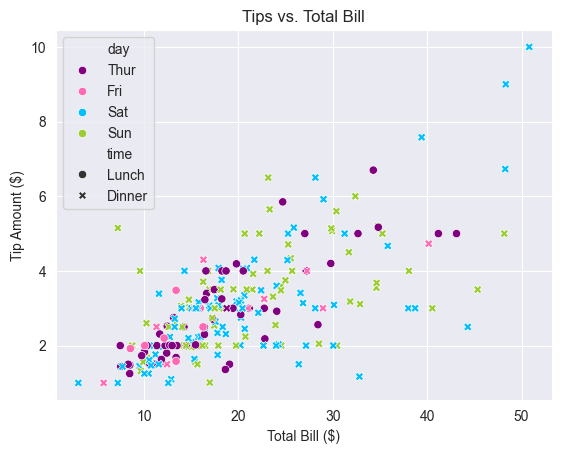

In [36]:
#Adding Multiple Variables - mapping done automatically with sns

tipgraph = sns.scatterplot(
    data=tips,
    x='total_bill',
    y='tip',
    style='time', #style set to time 
    hue='day', #colour for catagorize data set by day 
    palette=['purple', 'hotpink', 'deepskyblue', 'yellowgreen'] #use colours for seperation
)

tipgraph.set(
    title='Tips vs. Total Bill',
    xlabel='Total Bill ($)',
    ylabel='Tip Amount ($)'
)

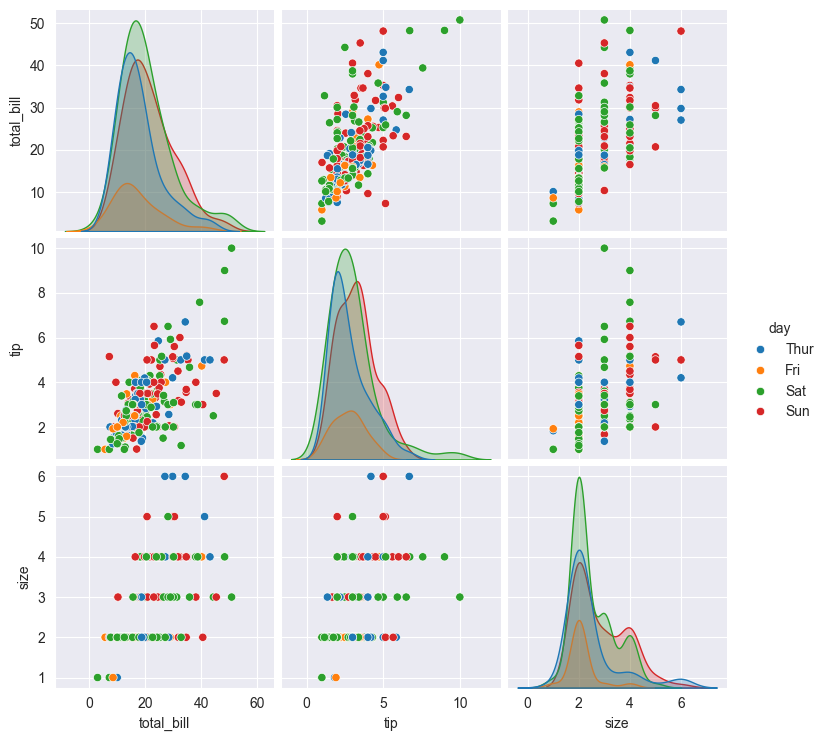

In [37]:
#Pair Plots - for exploratory analysis for our data - good for variable comparison
#to quickly see which relationships are relevant or salient- all quant. variables respective to day

sns.pairplot(data = tips,
             hue ='day') #here we are interested in day which we specify day for hue 




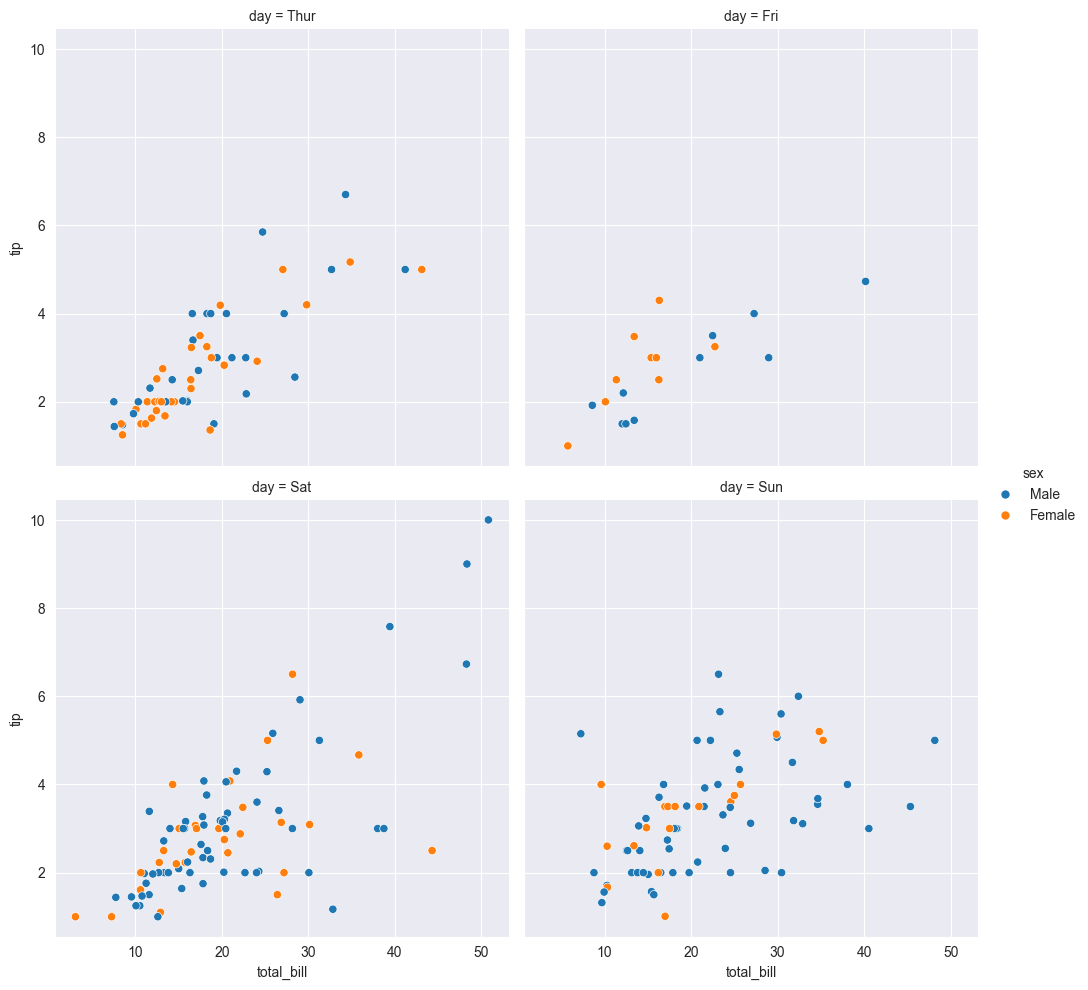

In [38]:
#Relplots!! for delving deeper in our variables:
#Finer data analysis/investigation 

daysplot = sns.relplot(
    data=tips,
    x='total_bill',
    y='tip',
    hue='sex',
    col='day',
    kind='scatter',
    col_wrap=2
)

PLOTLY!!

In [39]:
import plotly.graph_objects as go # 'go' is for graphic objects 

#x and y axis values
x1 = np.array(["Luffy", "Zoro", "Nami", "Sanji", "Usopp"])
y1 = np.array([110, 180, 240, 99, 220])


In [40]:
# Create a bar chart
graph = go.Figure() #make empty figure (this can handle arguments though e.g., (data=[go.Bar(x=x1, y=y1)])

#plot type and data
graph.add_trace(go.Bar(x=x1, y=y1))


In [41]:
# Now we update the graph to show titles:

graph.update_layout(
    title="Pirate Scores",
    xaxis_title="Pirates",
    yaxis_title="Score"
)

#not needed but here it is:

graph.show()

In [42]:
#we can also save our graph to be used in webpages: a resource 

graph.write_html("/Users/darshs/Documents/DSI-REPOS/visualizations-module-dsi/pirategraph.html")

In [43]:
#CUSTOMIZATIONS for plotly:

graph = go.Figure()

# Add scatter plot trace - customizations specified 
graph.add_trace(go.Scatter(
    x=x1, y=y1, mode='markers', # we want points for a scatter plot
    marker=dict(
        size=15,            # point size
        color='hotpink',    # point color
        opacity=1,          # opacity - transparency/alpha
        line=dict(width=5, color='purple')  # point outline colour
)))

# Update layout for title, axis labels, and figure size
graph.update_layout(
    title='Interactive Pirate Plot',
    xaxis_title='Pirates',
    yaxis_title='Scores',
    width=500,
    height=500 #square graph 500x500
)

#cool point you can hover over points to dynamically show point information and the graph is interactive again

WORD CLOUD - venn diagrams and more!

In [44]:
from wordcloud import WordCloud

# Read CSV from URL, skipping any bad lines
df = pd.read_csv("https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/movie_quotes.csv", 
                 on_bad_lines='skip')  # skip rows that cause parsing errors

df.head()  #display first 5 rows

,quote,movie,type,year
0,"Do, or do not. There is no try.",Star Wars: Episode V - The Empire Strikes Back,movie,1890
1,Listen to them. Children of the night. What mu...,Dracula,movie,1931
2,It's alive! It's alive!,Frankenstein,movie,1931
3,"Oh, no, it wasn't the airplanes. It was Beauty...",King Kong,movie,1933
4,"Magic Mirror on the wall, who is the fairest o...",Snow White and the Seven Dwarves,movie,1937


WORD CLOUDS:

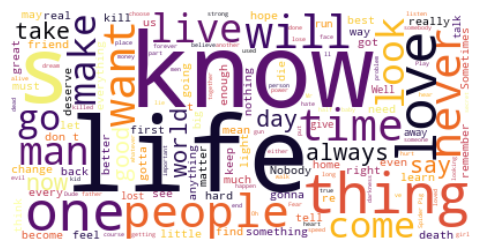

In [45]:
# Join all our text from each row from the quote column into a string
text = " ".join(each for each in df.quote)

# Generate the wordcloud image
wordcloud = WordCloud(
    background_color="white",  #background colour - white
    colormap='inferno'         #inferno colour map used
).generate(text)

# Use matplotlib syntax to display the image
fig, ax = plt.subplots(figsize=(7, 3))
ax.imshow(wordcloud, interpolation='bilinear')  ## remember 'imshow' from when we added pictures to our matplotlib axes and this line helps smooth our image
ax.axis("off")  #to show or hide axes
plt.show()


VENN DIAGRAM!

In [46]:
#import package:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted

In [53]:
# Define our sets
A = set(["apple", "banana","watermelon"])
B = set(["pumpkin",  "blueberry",  "apple", "key lime"])


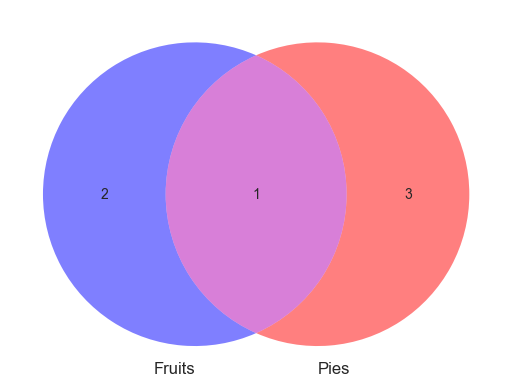

In [54]:
# Assign sets to each circle and modify the appearance
diagram = venn2_unweighted([A, B],
    set_labels=('Fruits', 'Pies'), #setting labels
    set_colors=("blue", "red"),  #setting circle colours
    alpha=0.5  #transparency/alpha for circles 
)

plt.show()

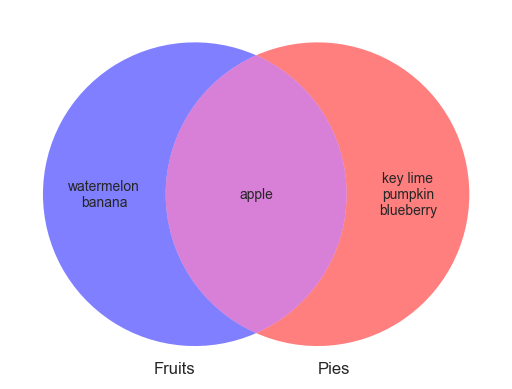

In [55]:
#We can modify our venn diagrams:
#This information comes from documentation: https://github.com/konstantint/matplotlib-venn/blob/master/matplotlib_venn/_common.py#L12

diagram = venn2_unweighted([A, B],
    set_labels=('Fruits', 'Pies'), #setting labels
    set_colors=("blue", "red"),  #setting circle colours
    alpha=0.5  #transparency/alpha for circles 
)
# We can assign custom text to each area of the Venn diagram
#Note the diagram was showing all the text in a line I looked it up and the \n fixes this by wrapping the text
diagram.get_label_by_id("10").set_text("\n".join(A - B))  #A
diagram.get_label_by_id("11").set_text("\n".join(A & B))  #The area with (A & B)
diagram.get_label_by_id("01").set_text("\n".join(B - A))  #B


plt.show()
